In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
img1 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/dog_backpack.png')
img2 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/watermark_no_copy.png')

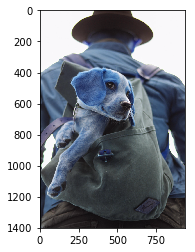

In [26]:
plt.imshow(img1)

In [27]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

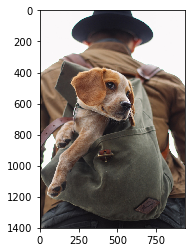

In [28]:
plt.imshow(img1)

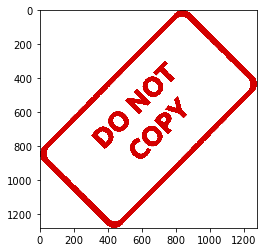

In [29]:
plt.imshow(img2)

In [11]:
img1.shape

(1401, 934, 3)

In [12]:
img2.shape

(1280, 1277, 3)

<b> Blending images by using addWeight method of cv2, where both the images have same size. </b>

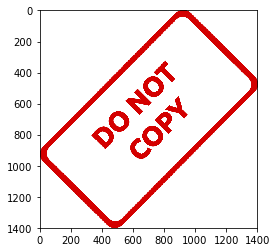

In [30]:
img1 = cv2.resize(img1, (1400,1400))
img2 = cv2.resize(img2, (1400,1400))
plt.imshow(img2)

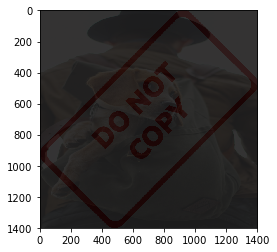

In [37]:
blended_image = cv2.addWeighted(src1=img1, alpha=0.1, src2=img2, beta=0.1, gamma=1)
plt.imshow(blended_image)

<b>Overlaying images with different sizes.</b>

<b>img1[starting_y:ending_y, starting_x:ending_x] = img2</b>

In [68]:
img1 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/dog_backpack.png')
img2 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

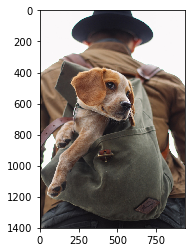

In [69]:
plt.imshow(img1)

In [49]:
# plt.imshow(img2)

In [70]:
img2 = cv2.resize(img2, (410,400))
# plt.imshow(img2)
# img2.shape[0]
# plt.imshow(img1[600:1000 , 0:500])

In [71]:
y_offset = 100
x_offset = 200
img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]] = img2
# img1[starting_y:ending_y, starting_x:ending_x] = img2

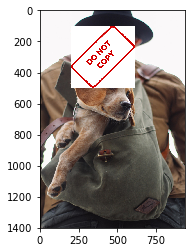

In [72]:
plt.imshow(img1)

In [73]:
x_offset+img2.shape[1]

610

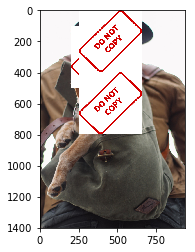

In [75]:
img1[400:400+img2.shape[0], 250:250+img2.shape[1]] = img2
plt.imshow(img1)

<b>Blending images with different sizes</b>

In [135]:
img1 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/dog_backpack.png')
img2 = cv2.imread('Computer-Vision-with-Python/Computer-Vision-with-Python/DATA/watermark_no_copy.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [65]:
# plt.imshow(img1)
# plt.imshow(img2)

In [136]:
# if img1.shape[0] < img2.shape[0] or img1.shape[1]<img2.shape[1]:
img2 = cv2.resize(img2, (600,600))

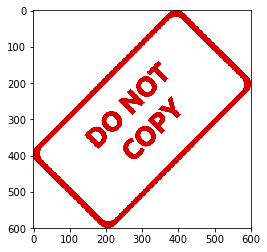

In [133]:
plt.imshow(img2)

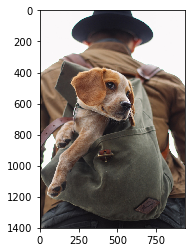

In [68]:
plt.imshow(img1)

<b>Finding Region of Interest(ROI) for blending different images</b>

In [137]:
x_offset=934-600
y_offset=1401-600
roi_img1 = img1[y_offset:y_offset+img2.shape[0], x_offset:x_offset+img2.shape[1]]
# plt.imshow(roi_img1)

In [117]:
img2.shape

(600, 600, 3)

In [118]:
roi_img1.shape

(600, 600, 3)

<b>Creating a Mask</b>

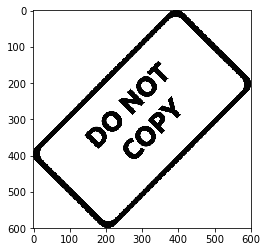

In [138]:
img2togray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
plt.imshow(img2togray, cmap='gray')

In [134]:
img2togray.shape

(600, 600)

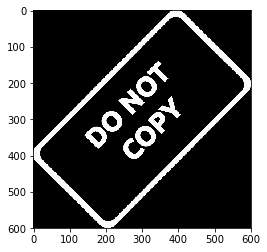

In [139]:
mask_inverse = cv2.bitwise_not(img2togray)
plt.imshow(mask_inverse, cmap='gray')

In [99]:
mask_inverse.shape

(400, 400)

<b>Extracting the white field/area only i.e. DO NOT COPY and convert mask to have 3 channels</b>

In [140]:
# import numpy as np

In [122]:
# shape_needed = img2.shape 
# shape_needed=(400,400,3) 
# To blend this image over the main image we need to have the same number of channel as the main image.
# np.full(), takes required shape, the fill_value i.e. which value we need to extract, & data type.
# white_background = np.full(img2.shape, 255, dtype=np.uint8)
# white_background.shape

(600, 600, 3)

(600, 600, 3)

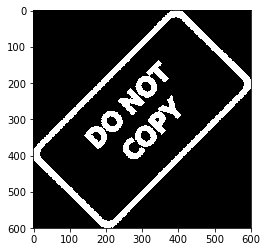

In [123]:
# white_background
# bk = cv2.bitwise_or(white_background, white_background, mask=mask_inverse)
# plt.imshow(bk)
# bk.shape

<b>Now bring the original foreground image(img2) and place on the top of the masked image</b>

In [141]:
foreground = cv2.bitwise_or(img2, img2, mask=mask_inverse)

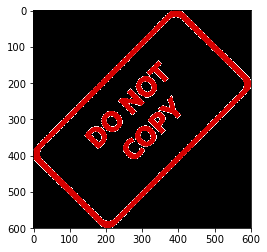

In [142]:
plt.imshow(foreground)

In [126]:
foreground.shape

(600, 600, 3)

In [127]:
roi_img1.shape

(600, 600, 3)

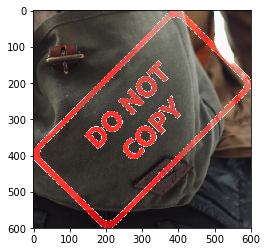

In [143]:
roi_img1 = cv2.bitwise_or(foreground, roi_img1)
plt.imshow(roi_img1)

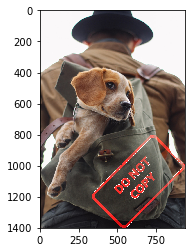

In [144]:
img1[y_offset:y_offset+roi_img1.shape[0], x_offset:x_offset+roi_img1.shape[1]] = roi_img1
plt.imshow(img1)